In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.dates as mdates
#from nsepy import get_history
from tabulate import tabulate
import cvxpy as cp
import sys
import yfinance as yf
##
import stock
import optimization
import riskmanagement
##
import pypfopt
from pypfopt import risk_models, expected_returns, plotting
from pypfopt import EfficientFrontier
from pypfopt import objective_functions
from pypfopt import EfficientSemivariance
from pypfopt import EfficientCVaR
from pypfopt import CLA
from pypfopt import HRPOpt
from pypfopt import DiscreteAllocation
##
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [ ]:
''' 
tickers = ["SHAKTIPUMP.NS","ADANIPORTS.NS","AFFLE.NS","JAMNAAUTO.NS", 
              "ADANIPOWER.NS", "MINDACORP.NS", "TATAPOWER.NS","IEX.NS",
           "GENESYS.NS","GOLDIAM.NS", "TECHM.NS", "CUMMINSIND.NS", "MINDAIND.NS",
          "MINDTREE.NS", "TATASTEEL.NS","TATAELXSI.NS","SUPPETRO.NS", "HDFCBANK.NS"]
'''

In [2]:
tickers = ["ADANIPORTS.NS","JAMNAAUTO.NS", "SAKSOFT.NS", "SCHAEFFLER.NS",
              "ADANIPOWER.NS", "MINDACORP.NS", "TATAPOWER.NS","IEX.NS",
           "DEEPAKNTR.NS","GOLDIAM.NS",  "MINDAIND.NS",
          "TATASTEEL.NS","TATAELXSI.NS","SUPPETRO.NS", "HCLTECH.NS"]

#ohlc = yf.download(tickers, start="2020-01-01", end="2022-02-21")
ohlc = yf.download(tickers, period="max")
prices = ohlc["Close"]
#prices = prices.fillna(0)
prices.tail(4)

[*********************100%***********************]  15 of 15 completed


,ADANIPORTS.NS,ADANIPOWER.NS,DEEPAKNTR.NS,GOLDIAM.NS,HCLTECH.NS,IEX.NS,JAMNAAUTO.NS,MINDACORP.NS,MINDAIND.NS,SAKSOFT.NS,SCHAEFFLER.NS,SUPPETRO.NS,TATAELXSI.NS,TATAPOWER.NS,TATASTEEL.NS
Date,,,,,,,,,,,,,,,
2022-03-04,700.150024,119.750000,1913.699951,753.099976,1138.449951,211.100006,99.550003,184.600006,911.200012,881.250000,1773.550049,738.700012,6673.600098,221.449997,1277.099976
2022-03-07,677.799988,116.449997,1830.650024,730.250000,1154.199951,207.899994,96.400002,175.050003,900.200012,896.000000,1788.099976,709.599976,6554.750000,216.199997,1291.900024
2022-03-08,688.849976,118.699997,1888.000000,739.150024,1175.300049,214.199997,96.449997,183.100006,928.750000,902.950012,1817.750000,723.400024,6572.700195,226.949997,1269.500000
2022-03-09,714.099976,121.300003,1974.650024,752.650024,1182.699951,222.800003,98.300003,190.750000,931.799988,931.250000,1817.599976,725.099976,6993.000000,229.250000,1255.349976


In [52]:
for col in(prices.columns):
    print(col)

ADANIPORTS.NS
ADANIPOWER.NS
CENTURYPLY.NS
GOLDIAM.NS
HCLTECH.NS
IEX.NS
JAMNAAUTO.NS
MINDACORP.NS
MINDAIND.NS
SAKSOFT.NS
SCHAEFFLER.NS
SUPPETRO.NS
TATAELXSI.NS
TATAPOWER.NS
TATASTEEL.NS


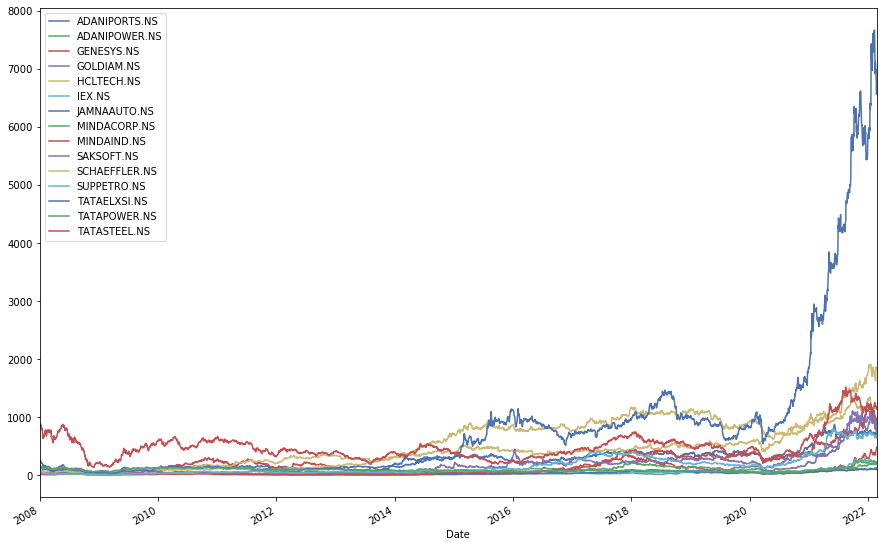

In [4]:
prices[prices.index >= "2008-01-01"].plot(figsize=(15,10));

In [3]:
# Calculate Expected Return of Portfolio
mu = expected_returns.capm_return(prices)
# Covariance matrix
S = risk_models.CovarianceShrinkage(prices).ledoit_wolf()
ef = EfficientFrontier(mu, S)
ef.min_volatility()
weights = ef.clean_weights()
weights

OrderedDict([('ADANIPORTS.NS', 0.07024),
             ('ADANIPOWER.NS', 0.06739),
             ('DEEPAKNTR.NS', 0.08378),
             ('GOLDIAM.NS', 0.06123),
             ('HCLTECH.NS', 0.07508),
             ('IEX.NS', 0.10242),
             ('JAMNAAUTO.NS', 0.07804),
             ('MINDACORP.NS', 0.08401),
             ('MINDAIND.NS', 0.06532),
             ('SAKSOFT.NS', 0.06355),
             ('SCHAEFFLER.NS', 0.03585),
             ('SUPPETRO.NS', 0.06371),
             ('TATAELXSI.NS', 0.04687),
             ('TATAPOWER.NS', 0.05615),
             ('TATASTEEL.NS', 0.04636)])

In [4]:
#Expected Return of Portfolio
mu

ADANIPORTS.NS    0.143208
ADANIPOWER.NS    0.149851
DEEPAKNTR.NS     0.105004
GOLDIAM.NS       0.155340
HCLTECH.NS       0.122022
IEX.NS           0.100394
JAMNAAUTO.NS     0.125803
MINDACORP.NS     0.114945
MINDAIND.NS      0.150206
SAKSOFT.NS       0.142991
SCHAEFFLER.NS    0.414205
SUPPETRO.NS      0.151792
TATAELXSI.NS     0.243070
TATAPOWER.NS     0.198239
TATASTEEL.NS     0.226039
Name: mkt, dtype: float64

In [5]:
returns = expected_returns.returns_from_prices(prices)
returns = returns.dropna()
es = EfficientSemivariance(mu, returns)
es.efficient_return(0.4)
es.portfolio_performance(verbose=True);

Expected annual return: 40.0%
Annual semi-deviation: 15.2%
Sortino Ratio: 2.51


In [6]:
es.weights = ef.weights
es.portfolio_performance(verbose=True);

Expected annual return: 15.4%
Annual semi-deviation: 17.0%
Sortino Ratio: 0.79


In [7]:
returns = expected_returns.returns_from_prices(prices).dropna()
returns.head()

,ADANIPORTS.NS,ADANIPOWER.NS,DEEPAKNTR.NS,GOLDIAM.NS,HCLTECH.NS,IEX.NS,JAMNAAUTO.NS,MINDACORP.NS,MINDAIND.NS,SAKSOFT.NS,SCHAEFFLER.NS,SUPPETRO.NS,TATAELXSI.NS,TATAPOWER.NS,TATASTEEL.NS
Date,,,,,,,,,,,,,,,
2017-10-24,-0.002088,-0.014778,0.004653,-0.000633,-0.024220,-0.015806,0.005962,-0.021498,-0.017826,0.028599,-0.001539,0.014597,0.002765,0.004893,0.010253
2017-10-25,0.022772,0.008333,-0.024780,0.000000,-0.008201,-0.025165,0.022862,-0.007442,-0.014386,0.003327,0.021427,-0.016218,0.013609,0.001217,-0.002363
2017-10-26,-0.002768,0.077686,0.011399,-0.000634,-0.041894,-0.000256,0.017384,0.011067,0.025682,0.055661,-0.001539,-0.040814,-0.027490,-0.001216,0.016165
2017-10-27,0.042843,0.001534,0.019958,-0.010780,-0.016225,0.001568,0.067535,0.011652,-0.025099,-0.063271,-0.003884,0.002079,0.002142,0.035910,-0.003291
2017-10-30,-0.005208,0.024502,-0.015193,0.005128,-0.021756,0.001310,0.005335,0.001745,0.010039,0.013892,-0.008742,0.011065,-0.006948,0.009988,-0.011764


In [8]:
ef = EfficientFrontier(mu, S)
ef.max_sharpe()
weight_arr = ef.weights
ef.portfolio_performance(verbose=True);

Expected annual return: 19.3%
Annual volatility: 14.1%
Sharpe Ratio: 1.23


In [9]:
weights

OrderedDict([('ADANIPORTS.NS', 0.07024),
             ('ADANIPOWER.NS', 0.06739),
             ('DEEPAKNTR.NS', 0.08378),
             ('GOLDIAM.NS', 0.06123),
             ('HCLTECH.NS', 0.07508),
             ('IEX.NS', 0.10242),
             ('JAMNAAUTO.NS', 0.07804),
             ('MINDACORP.NS', 0.08401),
             ('MINDAIND.NS', 0.06532),
             ('SAKSOFT.NS', 0.06355),
             ('SCHAEFFLER.NS', 0.03585),
             ('SUPPETRO.NS', 0.06371),
             ('TATAELXSI.NS', 0.04687),
             ('TATAPOWER.NS', 0.05615),
             ('TATASTEEL.NS', 0.04636)])

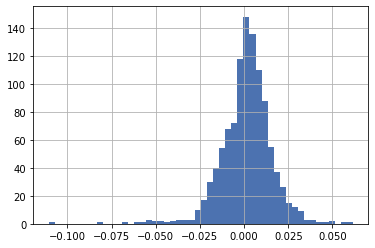

In [11]:
# Compute CVaR
portfolio_rets = (returns * weight_arr).sum(axis=1)
portfolio_rets.hist(bins=50);

In [12]:
# VaR
var = portfolio_rets.quantile(0.05)
cvar = portfolio_rets[portfolio_rets <= var].mean()
print("VaR: {:.2f}%".format(100*var))
print("CVaR: {:.2f}%".format(100*cvar))

VaR: -2.06%
CVaR: -3.40%


In [13]:
ec = EfficientCVaR(mu, returns)
ec.min_cvar()

ec.portfolio_performance(verbose=True);

Expected annual return: 27.9%
Conditional Value at Risk: 2.52%


In [14]:
cla = CLA(mu, S)
cla.max_sharpe()
cla.portfolio_performance(verbose=True);

Expected annual return: 18.8%
Annual volatility: 13.7%
Sharpe Ratio: 1.22


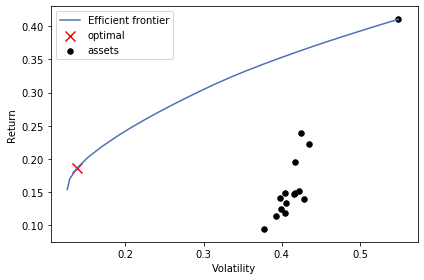

In [71]:
ax = plotting.plot_efficient_frontier(cla, showfig=False)

In [15]:
# Note: functions are minimised. If you want to maximise an objective, stick a minus sign in it.
def logarithmic_barrier_objective(w, cov_matrix, k=0.1):
    log_sum = cp.sum(cp.log(w))
    var = cp.quad_form(w, cov_matrix)
    return var - k * log_sum

In [16]:
mu = expected_returns.capm_return(prices)
S = risk_models.semicovariance(prices)

ef = EfficientFrontier(mu, S, weight_bounds=(0.01, 0.2))
ef.convex_objective(logarithmic_barrier_objective, cov_matrix=S, k=0.001)
weights = ef.clean_weights()
weights

OrderedDict([('ADANIPORTS.NS', 0.05459),
             ('ADANIPOWER.NS', 0.04857),
             ('DEEPAKNTR.NS', 0.09888),
             ('GOLDIAM.NS', 0.03916),
             ('HCLTECH.NS', 0.06365),
             ('IEX.NS', 0.2),
             ('JAMNAAUTO.NS', 0.07328),
             ('MINDACORP.NS', 0.11171),
             ('MINDAIND.NS', 0.0478),
             ('SAKSOFT.NS', 0.03908),
             ('SCHAEFFLER.NS', 0.06744),
             ('SUPPETRO.NS', 0.04558),
             ('TATAELXSI.NS', 0.03713),
             ('TATAPOWER.NS', 0.04026),
             ('TATASTEEL.NS', 0.03286)])

In [17]:
ef.portfolio_performance(verbose=True);

Expected annual return: 15.4%
Annual volatility: 11.9%
Sharpe Ratio: 1.13


In [18]:
ef = EfficientFrontier(mu, S, weight_bounds=(0.01, 0.2))
jd_index = ef.tickers.index("ADANIPOWER.NS")  # get the index of JD
ef.add_constraint(lambda w: w[jd_index] <= 0.1)
ef.convex_objective(logarithmic_barrier_objective, cov_matrix=S, k=0.001)
weights = ef.clean_weights()
weights

OrderedDict([('ADANIPORTS.NS', 0.05459),
             ('ADANIPOWER.NS', 0.04857),
             ('DEEPAKNTR.NS', 0.09888),
             ('GOLDIAM.NS', 0.03916),
             ('HCLTECH.NS', 0.06365),
             ('IEX.NS', 0.2),
             ('JAMNAAUTO.NS', 0.07328),
             ('MINDACORP.NS', 0.11171),
             ('MINDAIND.NS', 0.0478),
             ('SAKSOFT.NS', 0.03908),
             ('SCHAEFFLER.NS', 0.06744),
             ('SUPPETRO.NS', 0.04558),
             ('TATAELXSI.NS', 0.03713),
             ('TATAPOWER.NS', 0.04026),
             ('TATASTEEL.NS', 0.03286)])

# Hierarchial Risk Parity Managment

In [19]:
rets = expected_returns.returns_from_prices(prices)
#rets.tail()
hrp = HRPOpt(rets)
hrp.optimize()
weights = hrp.clean_weights()
weights

OrderedDict([('ADANIPORTS.NS', 0.06142),
             ('ADANIPOWER.NS', 0.04451),
             ('DEEPAKNTR.NS', 0.09319),
             ('GOLDIAM.NS', 0.05285),
             ('HCLTECH.NS', 0.10732),
             ('IEX.NS', 0.11166),
             ('JAMNAAUTO.NS', 0.07238),
             ('MINDACORP.NS', 0.08485),
             ('MINDAIND.NS', 0.06249),
             ('SAKSOFT.NS', 0.06453),
             ('SCHAEFFLER.NS', 0.0132),
             ('SUPPETRO.NS', 0.07221),
             ('TATAELXSI.NS', 0.04983),
             ('TATAPOWER.NS', 0.06404),
             ('TATASTEEL.NS', 0.04551)])

In [20]:
hrp.portfolio_performance(verbose=True);

Expected annual return: 33.2%
Annual volatility: 22.6%
Sharpe Ratio: 1.38


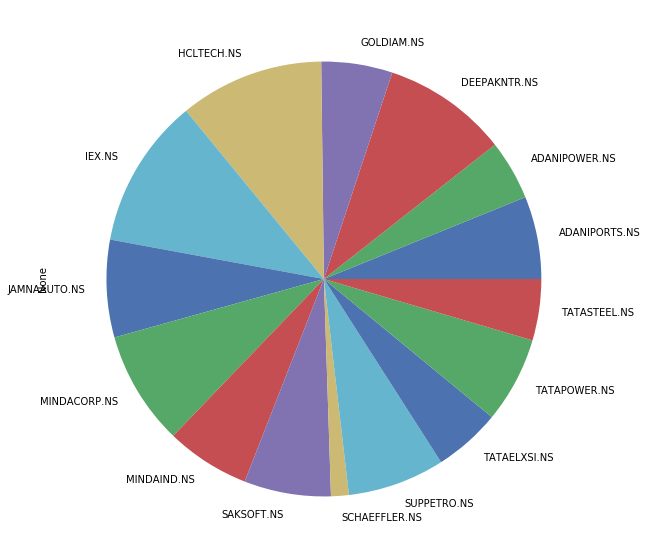

In [21]:
fig1 = pd.Series(weights).plot.pie(figsize=(10, 10));
#savefig("/Users/kishor/pf.png",dpi=600)

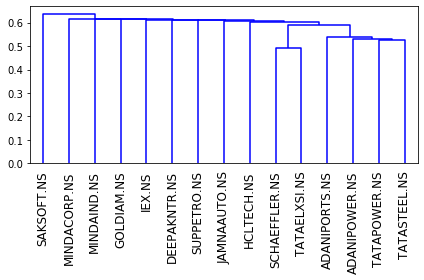

In [22]:
plotting.plot_dendrogram(hrp); 
#savefig("/Users/kishor/den.png",dpi=600)

In [30]:
dfn = prices.fillna(0)
latest_prices = dfn.iloc[-1]  # prices as of the day you are allocating
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=400000, short_ratio=0.3)
alloc, leftover = da.lp_portfolio()
print(f"Discrete allocation performed with \u20B9 {leftover:.2f} leftover")
alloc

Discrete allocation performed with ₹ 82.50 leftover


{'ADANIPORTS.NS': 36,
 'ADANIPOWER.NS': 150,
 'DEEPAKNTR.NS': 20,
 'GOLDIAM.NS': 28,
 'HCLTECH.NS': 36,
 'IEX.NS': 209,
 'JAMNAAUTO.NS': 300,
 'MINDACORP.NS': 186,
 'MINDAIND.NS': 27,
 'SAKSOFT.NS': 29,
 'SCHAEFFLER.NS': 3,
 'SUPPETRO.NS': 40,
 'TATAELXSI.NS': 3,
 'TATAPOWER.NS': 113,
 'TATASTEEL.NS': 14}

# Variance and Return: Final Check

In [3]:
ohlc1 = yf.download(tickers, start="2020-01-01", end="2022-03-10")
#ohlc = yf.download(tickers, period="max")
prices1 = ohlc1["Close"]
prices1.to_csv("prices.csv")
df = pd.read_csv("prices.csv") 
df = df.fillna(0)
df.tail(3)

[*********************100%***********************]  15 of 15 completed


,Date,ADANIPORTS.NS,ADANIPOWER.NS,DEEPAKNTR.NS,GOLDIAM.NS,HCLTECH.NS,IEX.NS,JAMNAAUTO.NS,MINDACORP.NS,MINDAIND.NS,SAKSOFT.NS,SCHAEFFLER.NS,SUPPETRO.NS,TATAELXSI.NS,TATAPOWER.NS,TATASTEEL.NS
543,2022-03-07,677.799988,116.449997,1830.650024,730.250000,1154.199951,207.899994,96.400002,175.050003,900.200012,896.000000,1788.099976,709.599976,6554.750000,216.199997,1291.900024
544,2022-03-08,688.849976,118.699997,1888.000000,739.150024,1175.300049,214.199997,96.449997,183.100006,928.750000,902.950012,1817.750000,723.400024,6572.700195,226.949997,1269.500000
545,2022-03-09,714.099976,121.300003,1974.650024,752.650024,1182.699951,222.800003,98.300003,190.750000,931.799988,931.250000,1817.599976,725.099976,6993.000000,229.250000,1255.349976


,Date,ADANIPORTS.NS,ADANIPOWER.NS,DEEPAKNTR.NS,GOLDIAM.NS,HCLTECH.NS,IEX.NS,JAMNAAUTO.NS,MINDACORP.NS,MINDAIND.NS,SAKSOFT.NS,SCHAEFFLER.NS,SUPPETRO.NS,TATAELXSI.NS,TATAPOWER.NS,TATASTEEL.NS
536,2022-02-23,-4.07,16.37,-9.12,2.66,2.20,5.80,5.63,25.01,12.93,4.82,20.09,-4.92,19.56,20.62,-8.77
537,2022-02-24,-12.22,5.47,-18.50,-8.25,-2.74,-1.84,1.14,20.11,7.33,-5.58,16.50,-9.05,12.34,13.82,-15.29
538,2022-02-25,-5.67,15.20,-10.17,-0.08,-0.00,3.35,3.47,23.82,13.23,1.27,19.52,-5.69,17.85,19.72,-8.07
539,2022-02-28,-3.79,14.89,-10.08,-3.14,-0.34,3.95,7.06,23.56,10.28,2.41,20.23,-6.11,16.76,20.55,-1.41
540,2022-03-02,-3.37,14.33,-13.39,-5.73,-1.46,7.42,6.35,19.12,11.79,6.20,20.88,-5.83,18.21,21.11,3.93
541,2022-03-03,-3.86,13.95,-11.55,-1.67,0.59,7.08,4.36,18.13,12.99,7.23,21.60,3.92,19.15,21.25,4.90
542,2022-03-04,-4.78,11.75,-15.14,-1.43,0.39,5.71,4.64,17.46,8.87,4.53,17.28,4.85,19.09,19.16,2.91
543,2022-03-07,-8.16,9.19,-20.38,-4.83,1.66,4.06,1.39,12.78,7.58,5.88,17.74,0.94,17.40,16.94,3.97
544,2022-03-08,-6.37,10.83,-16.76,-3.79,3.31,6.67,1.31,16.42,10.23,6.38,18.86,2.81,17.40,20.60,2.21
545,2022-03-09,-2.57,12.66,-11.69,-2.15,3.81,10.05,3.06,19.56,10.32,8.99,18.63,3.04,22.12,21.13,1.05


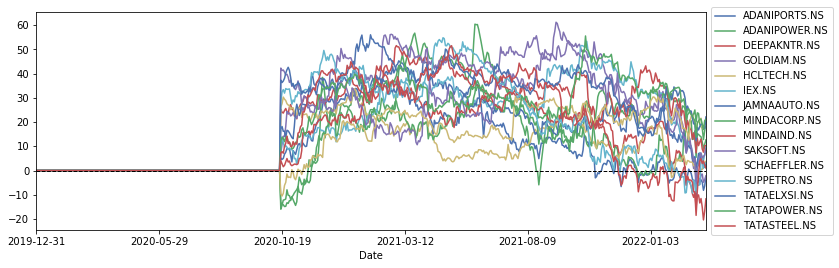

In [4]:
dma200 = optimization.DMA_200(df)
dma200.tail(10)

In [26]:
# Get weight from optimization 
# make percentage
W1 = pd.DataFrame([weights])
W = W1.iloc[0].to_numpy()*100
W

array([ 6.142,  4.451,  9.319,  5.285, 10.732, 11.166,  7.238,  8.485,
        6.249,  6.453,  1.32 ,  7.221,  4.983,  6.404,  4.551])

In [27]:
#W = np.array([11.17,4.158,8.04,7.882,9.765,18.916,9.886,9.246,7.53,13.407])
#W = np.array([5.848,11.507,18.069,6.086,2.5,6.78,10.06,22.774,9.582,6.792])
CM = optimization.Variance(df,W)


Portfolio Variance = [[0.17692195]]
Correlation between the Equities:


Standard Deviation of Portfolio = 1.805 %

Based on 1st STD (68% chances)
---------------------------------
Expected PF Return = 66.27 %
Annaul PF Variance  = 28.659 %
---------------------------------
Lower Bound Profit =  37.611 %
Upper Bound Profit =  94.929 %
---------------------------------
Based on 2nd STD (95% chances)
---------------------------------
Annaul PF Variance  = 57.319 %
---------------------------------
Lower Bound Profit =  8.950999999999993 %
Upper Bound Profit =  123.589 %
---------------------------------
Based on 3rd STD (99% chances)
---------------------------------
Annaul PF Variance  = 57.319 %
---------------------------------
Lower Bound Profit =  -19.708 %
Upper Bound Profit =  152.248 %


,Daily Avg. Rt %,Yearly Return %
ADANIPORTS.NS,0.15,38.20
ADANIPOWER.NS,0.20,49.17
DEEPAKNTR.NS,0.35,87.90
GOLDIAM.NS,0.37,94.03
HCLTECH.NS,0.16,39.27
IEX.NS,0.32,80.01
JAMNAAUTO.NS,0.19,47.27
MINDACORP.NS,0.17,41.69
MINDAIND.NS,0.23,57.15
SAKSOFT.NS,0.35,89.39


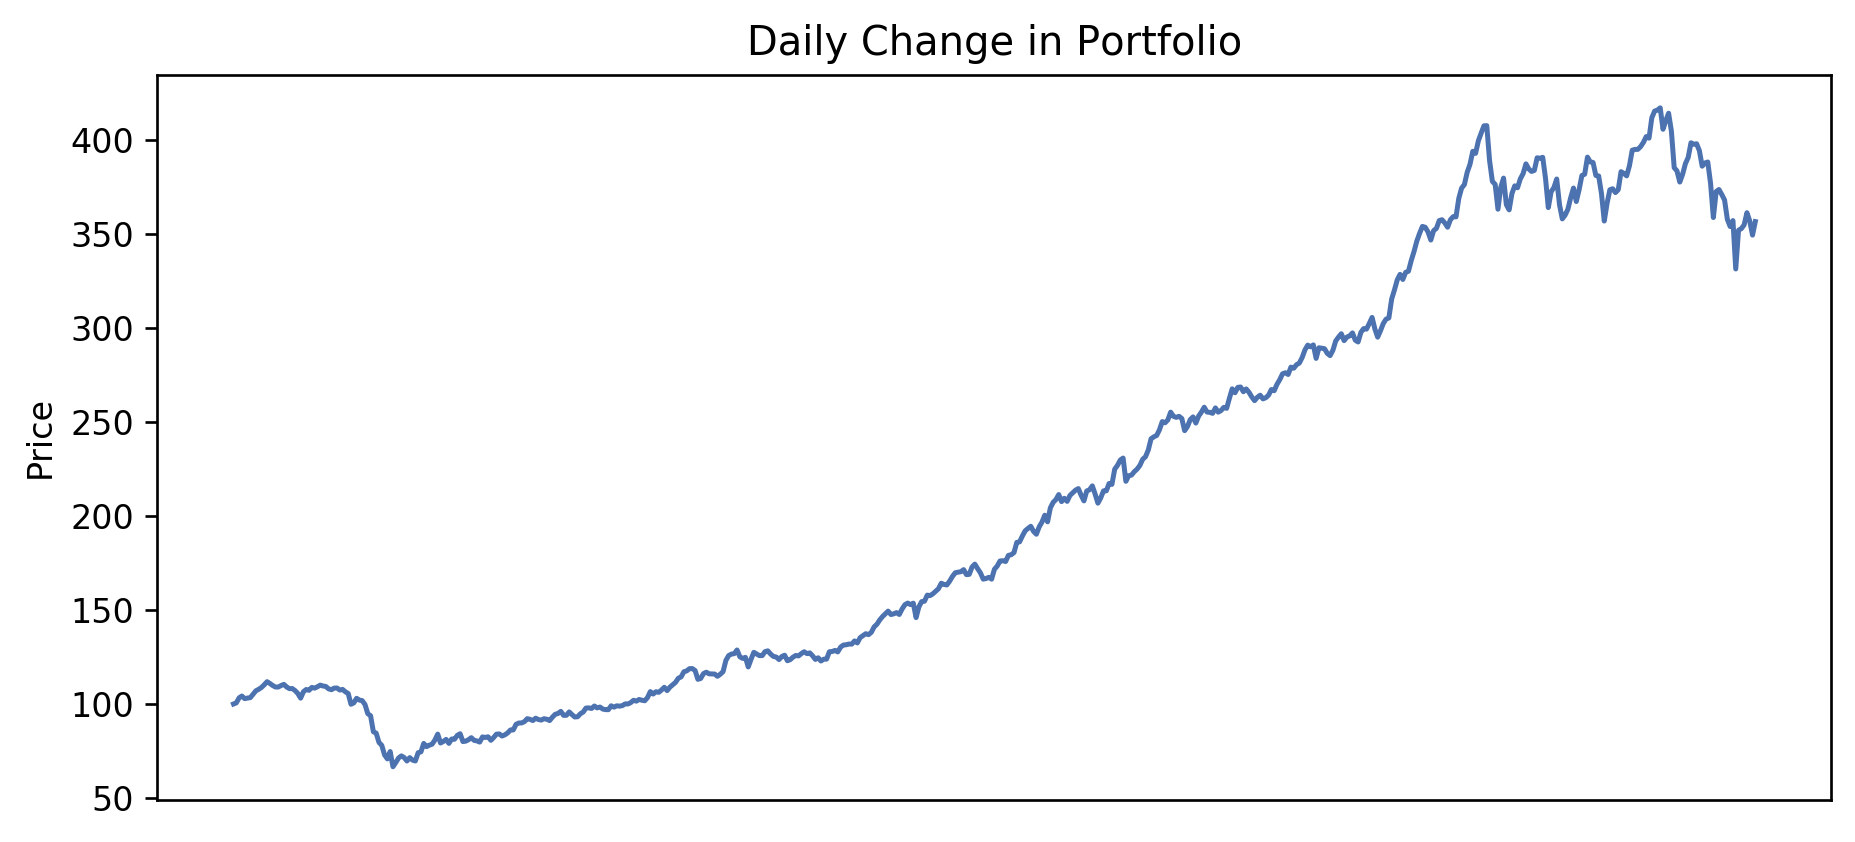

In [28]:
Capital, No_Days = 100, 252
ret = optimization.Portfolio_SD_Return(df,Capital,W,No_Days)
ret